<a href="https://colab.research.google.com/github/audwls4545/metaverse/blob/main/drinks_230501_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('drinks.csv')
display(df.head())
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,religion
0,0,Afghanistan,0,0,0,0.0,muslim mostly
1,1,Albania,89,132,54,4.9,muslim mostly
2,2,Algeria,25,0,14,0.7,christian mostly
3,3,Andorra,245,138,312,12.4,christian mostly
4,4,Angola,217,57,45,5.9,christian mostly


There are 193 rows and 7 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 193 non-null    int64  
 3   spirit_servings               193 non-null    int64  
 4   wine_servings                 193 non-null    int64  
 5   total_litres_of_pure_alcohol  193 non-null    float64
 6   religion                      193 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 10.7+ KB


In [ ]:
# 형(타입) 확인
df['country'].dtype

dtype('O')

In [ ]:
df['beer_servings'].dtype

dtype('int64')

In [ ]:
# 타입이 많을 경우 
for cnt, i in enumerate(df.columns):
    print(cnt,i,'->',df[i].dtype)

0 Unnamed: 0 -> int64
1 country -> object
2 beer_servings -> int64
3 spirit_servings -> int64
4 wine_servings -> int64
5 total_litres_of_pure_alcohol -> float64
6 religion -> object


In [ ]:
# 리스트컴프리헨션으로 만들기 -> 이거는 리스트로 만드는 것이라서 마지막 줄에 None의 리스트가 나옴
[print(cnt,i,'->',df[i].dtype) for cnt, i in enumerate(df.columns)]  

0 Unnamed: 0 -> int64
1 country -> object
2 beer_servings -> int64
3 spirit_servings -> int64
4 wine_servings -> int64
5 total_litres_of_pure_alcohol -> float64
6 religion -> object


[None, None, None, None, None, None, None]

In [ ]:
for cnt, i in enumerate(df.columns):
    if df[i].dtype == 'int64':
        print(cnt,i,'->',df[i].dtype)

0 Unnamed: 0 -> int64
2 beer_servings -> int64
3 spirit_servings -> int64
4 wine_servings -> int64


In [ ]:
typeList = ['int64','int32','float64','float32']
for cnt, i in enumerate(df.columns):
    if df[i].dtype in typeList:
        print(cnt,i,'->',df[i].dtype)

0 Unnamed: 0 -> int64
2 beer_servings -> int64
3 spirit_servings -> int64
4 wine_servings -> int64
5 total_litres_of_pure_alcohol -> float64


In [ ]:
typeList = ['int64','int32','float64','float32']
for cnt, i in enumerate(df.columns):
    if df[i].dtype not in typeList:
        print(cnt,i,'->',df[i].dtype)

1 country -> object
6 religion -> object


In [ ]:
#결측값 확인하는 함수
df.isna().sum()

Unnamed: 0                      0
country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
religion                        0
dtype: int64

In [ ]:
# 결측값을 퍼센트로 확인하기
tmp = df.isna().sum()
tmp/len(df)

Unnamed: 0                      0.0
country                         0.0
beer_servings                   0.0
spirit_servings                 0.0
wine_servings                   0.0
total_litres_of_pure_alcohol    0.0
religion                        0.0
dtype: float64

In [ ]:
df[df['spirit_servings'].isnull()]

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,religion


In [ ]:
#중복제거 출력
df['religion'].unique()

array(['muslim mostly', 'christian mostly', 'other', 'jews'], dtype=object)

In [ ]:
#결측이 있으면 na로 출력
df['spirit_servings'].sum(skipna=False)

15632

In [ ]:
#데이터 필터링
#df[df['country'] == 'korea'] #korea라고 없을 수 도 있음
df[df['country'].str.contains('Ko')] #그래서 ko가 포함된 데이터를 먼저 확인

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,religion
46,46,North Korea,0,0,0,0.0,other
138,138,South Korea,140,16,9,9.8,other


In [ ]:
df[df['beer_servings']==0]

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,religion
0,0,Afghanistan,0,0,0,0.0,muslim mostly
13,13,Bangladesh,0,0,0,0.0,muslim mostly
40,40,Cook Islands,0,254,74,5.9,christian mostly
46,46,North Korea,0,0,0,0.0,other
79,79,Iran,0,0,0,0.0,muslim mostly
90,90,Kuwait,0,0,0,0.0,muslim mostly
97,97,Libya,0,0,0,0.0,muslim mostly
103,103,Maldives,0,0,0,0.0,christian mostly
106,106,Marshall Islands,0,0,0,0.0,christian mostly
107,107,Mauritania,0,0,0,0.0,christian mostly


In [ ]:
#빈공간에 0을 채워둠
#df['beer_servings'] = df['beer_servings'].fillna(0)

In [ ]:
#데이터 필터링
#df[df['country'] == 'korea'] #korea라고 없을 수 도 있음
df[df['country'].str.contains('Ko')] #그래서 ko가 포함된 데이터를 먼저 확인

df['beer%'] = df['beer_servings']/df['beer_servings'].sum() # 맥주의 전체에서 몇 퍼센트인지 확인
df['spiri%'] = df['spirit_servings']/df['spirit_servings'].sum()
df['wine%'] = df['wine_servings']/df['wine_servings'].sum()

df.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,religion,beer%,spiri%,wine%
0,0,Afghanistan,0,0,0,0.0,muslim mostly,0.000000,0.000000,0.000000
1,1,Albania,89,132,54,4.9,muslim mostly,0.004344,0.008444,0.005658
2,2,Algeria,25,0,14,0.7,christian mostly,0.001220,0.000000,0.001467
3,3,Andorra,245,138,312,12.4,christian mostly,0.011958,0.008828,0.032691
4,4,Angola,217,57,45,5.9,christian mostly,0.010591,0.003646,0.004715


In [ ]:
df[df['country'].str.contains('Ko')]

df[df['religion']=='other']

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,religion,beer%,spiri%,wine%
17,17,Belize,263,114,8,6.8,other,0.012836,0.007293,0.000838
18,18,Benin,34,4,13,1.1,other,0.001659,0.000256,0.001362
27,27,Burundi,88,0,0,6.3,other,0.004295,0.000000,0.000000
29,29,Cabo Verde,144,56,16,4.0,other,0.007028,0.003582,0.001676
30,30,Cambodia,57,65,1,2.2,other,0.002782,0.004158,0.000105
36,36,China,79,192,8,5.0,other,0.003856,0.012282,0.000838
38,38,Comoros,1,3,1,0.1,other,0.000049,0.000192,0.000105
46,46,North Korea,0,0,0,0.0,other,0.000000,0.000000,0.000000
62,62,Gabon,347,98,59,8.9,other,0.016936,0.006269,0.006182
63,63,Gambia,8,0,1,2.4,other,0.000390,0.000000,0.000105


In [ ]:
tmp = df[df['religion']=='other']
tmp.sort_values(by='beer%', ascending=False)

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,religion,beer%,spiri%,wine%
62,62,Gabon,347,98,59,8.9,other,0.016936,0.006269,0.006182
17,17,Belize,263,114,8,6.8,other,0.012836,0.007293,0.000838
68,68,Grenada,199,438,28,11.9,other,0.009713,0.028019,0.002934
174,174,Trinidad & Tobago,197,156,7,6.4,other,0.009615,0.009980,0.000733
125,125,Niue,188,200,7,7.0,other,0.009176,0.012794,0.000733
29,29,Cabo Verde,144,56,16,4.0,other,0.007028,0.003582,0.001676
138,138,South Korea,140,16,9,9.8,other,0.006833,0.001024,0.000943
163,163,Suriname,128,178,7,5.6,other,0.006247,0.011387,0.000733
189,189,Vietnam,111,2,1,2.0,other,0.005418,0.000128,0.000105
169,169,Thailand,99,258,1,6.4,other,0.004832,0.016505,0.000105


In [ ]:
df['beer%'] = df['beer_servings']/df['beer_servings'].sum() # 맥주의 전체에서 몇 퍼센트인지 확인
df['spiri%'] = df['spirit_servings']/df['spirit_servings'].sum()
df['wine%'] = df['wine_servings']/df['wine_servings'].sum()

tmp = df[df['religion']=='other']
tmp.sort_values(by='beer%', ascending=False) #종교에서 맥주 퍼센트 순위로 정렬

tmp['beer_rank'] = tmp['beer%'].rank(ascending=False, na_option='top')
tmp['spiri_rank'] = tmp['spiri%'].rank(ascending=False, na_option='top')
tmp['wine_rank'] = tmp['wine%'].rank(ascending=False, na_option='top')
tmp['total_rank'] = tmp['total_litres_of_pure_alcohol'].rank(ascending=False, na_option='top')
tmp[tmp['country']=='South Korea']

tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 17 to 189
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    34 non-null     int64  
 1   country                       34 non-null     object 
 2   beer_servings                 34 non-null     int64  
 3   spirit_servings               34 non-null     int64  
 4   wine_servings                 34 non-null     int64  
 5   total_litres_of_pure_alcohol  34 non-null     float64
 6   religion                      34 non-null     object 
 7   beer%                         34 non-null     float64
 8   spiri%                        34 non-null     float64
 9   wine%                         34 non-null     float64
 10  beer_rank                     34 non-null     float64
 11  spiri_rank                    34 non-null     float64
 12  wine_rank                     34 non-null     float64
 13  total

<ipython-input-34-5fa79bc0c1c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['beer_rank'] = tmp['beer%'].rank(ascending=False, na_option='top')
<ipython-input-34-5fa79bc0c1c1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['spiri_rank'] = tmp['spiri%'].rank(ascending=False, na_option='top')
<ipython-input-34-5fa79bc0c1c1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
len(df)

193

In [ ]:
allCountry = df

allCountry['beer_rank'] = allCountry['beer%'].rank(ascending=False, na_option='top')
allCountry['spiri_rank'] = allCountry['spiri%'].rank(ascending=False, na_option='top')
allCountry['wine_rank'] = allCountry['wine%'].rank(ascending=False, na_option='top')
allCountry['total_rank'] = allCountry['total_litres_of_pure_alcohol'].rank(ascending=False, na_option='top')
allCountry[allCountry['country']=='South Korea']

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,religion,beer%,spiri%,wine%,beer_rank,spiri_rank,wine_rank,total_rank
138,138,South Korea,140,16,9,9.8,other,0.006833,0.001024,0.000943,66.0,129.5,93.5,28.0


In [ ]:
##상관도
df[['spirit_servings','wine_servings']].corr() #코렐레이션함수
#대각선 위를 봐도 되고 아래를 봐도 됨

,spirit_servings,wine_servings
spirit_servings,1.000000,0.194797
wine_servings,0.194797,1.000000


In [ ]:
df.corr()

<ipython-input-39-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,beer%,spiri%,wine%,beer_rank,spiri_rank,wine_rank,total_rank
Unnamed: 0,1.000000,-0.054412,-0.071049,-0.068848,-0.052901,-0.054412,-0.071049,-0.068848,0.061573,0.044385,0.068697,0.039394
beer_servings,-0.054412,1.000000,0.458819,0.527172,0.835839,1.000000,0.458819,0.527172,-0.952790,-0.562448,-0.659996,-0.830207
spirit_servings,-0.071049,0.458819,1.000000,0.194797,0.654968,0.458819,1.000000,0.194797,-0.491970,-0.914176,-0.423301,-0.650592
wine_servings,-0.068848,0.527172,0.194797,1.000000,0.667598,0.527172,0.194797,1.000000,-0.530676,-0.302612,-0.788970,-0.634801
total_litres_of_pure_alcohol,-0.052901,0.835839,0.654968,0.667598,1.000000,0.835839,0.654968,0.667598,-0.850022,-0.692069,-0.739770,-0.984410
beer%,-0.054412,1.000000,0.458819,0.527172,0.835839,1.000000,0.458819,0.527172,-0.952790,-0.562448,-0.659996,-0.830207
spiri%,-0.071049,0.458819,1.000000,0.194797,0.654968,0.458819,1.000000,0.194797,-0.491970,-0.914176,-0.423301,-0.650592
wine%,-0.068848,0.527172,0.194797,1.000000,0.667598,0.527172,0.194797,1.000000,-0.530676,-0.302612,-0.788970,-0.634801
beer_rank,0.061573,-0.952790,-0.491970,-0.530676,-0.850022,-0.952790,-0.491970,-0.530676,1.000000,0.620381,0.716275,0.876315
spiri_rank,0.044385,-0.562448,-0.914176,-0.302612,-0.692069,-0.562448,-0.914176,-0.302612,0.620381,1.000000,0.554264,0.724381


<ipython-input-42-8ed7774cb368>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="viridis",annot=True,linewidth=0.5)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'Unnamed: 0'),
  Text(0, 1.5, 'beer_servings'),
  Text(0, 2.5, 'spirit_servings'),
  Text(0, 3.5, 'wine_servings'),
  Text(0, 4.5, 'total_litres_of_pure_alcohol'),
  Text(0, 5.5, 'beer%'),
  Text(0, 6.5, 'spiri%'),
  Text(0, 7.5, 'wine%'),
  Text(0, 8.5, 'beer_rank'),
  Text(0, 9.5, 'spiri_rank'),
  Text(0, 10.5, 'wine_rank'),
  Text(0, 11.5, 'total_rank')])

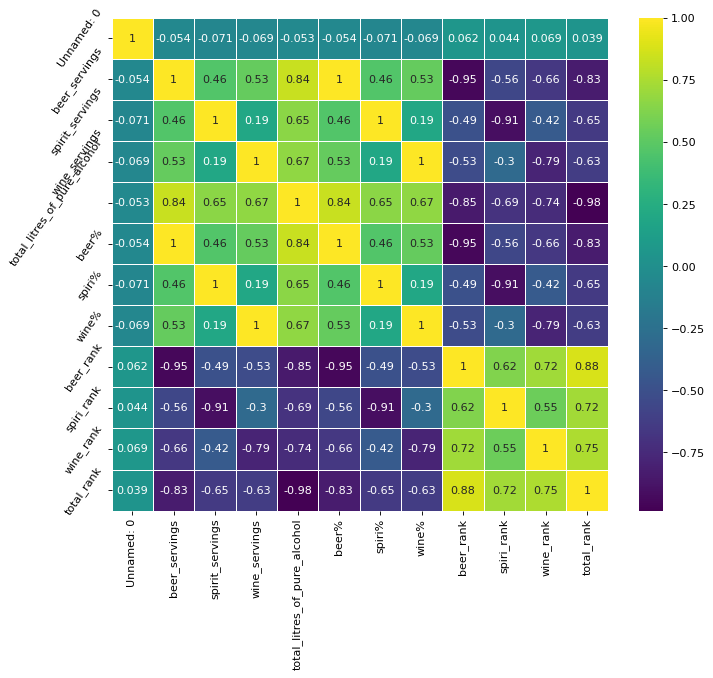

In [ ]:
##상관계수 시각화
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(df.corr(),cmap="viridis",annot=True,linewidth=0.5)
plt.yticks(rotation=55)

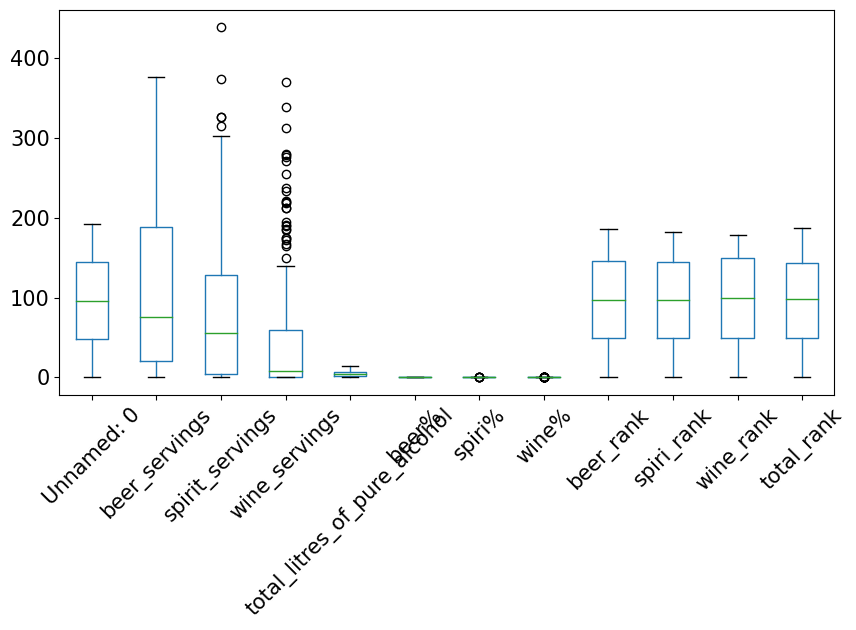

In [ ]:
plt.figure(figsize=(10,5))
boxplot = df.boxplot(grid=False, rot=45, fontsize=15)

In [ ]:
df[df['spirit_servings']>=300]

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,religion,beer%,spiri%,wine%,beer_rank,spiri_rank,wine_rank,total_rank
15,15,Belarus,142,373,42,14.4,christian mostly,0.006931,0.023861,0.004401,65.0,2.0,59.0,1.0
68,68,Grenada,199,438,28,11.9,other,0.009713,0.028019,0.002934,41.0,1.0,65.0,4.0
72,72,Guyana,93,302,1,7.1,other,0.004539,0.019319,0.000105,82.5,6.0,150.0,51.0
73,73,Haiti,1,326,1,5.9,christian mostly,0.000049,0.020855,0.000105,176.5,3.5,150.0,77.0
141,141,Russian Federation,247,326,73,11.5,christian mostly,0.012055,0.020855,0.007649,23.0,3.5,46.0,7.0
144,144,St. Lucia,171,315,71,10.1,christian mostly,0.008346,0.020151,0.007439,52.0,5.0,47.0,25.0


In [ ]:
tmp = df[df['wine_servings']>180]
tmp['religion'].value_counts()

df.describe()
tmp.describe()

,Unnamed: 0,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,beer%,spiri%,wine%,beer_rank,spiri_rank,wine_rank,total_rank
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,84.100000,201.000000,87.100000,244.000000,9.620000,0.009810,0.005572,0.025566,42.600000,79.275000,10.500000,28.70000
std,63.232986,63.795727,49.467586,52.715722,1.884172,0.003114,0.003165,0.005523,23.770614,35.317535,5.913855,21.08841
min,3.000000,85.000000,0.000000,185.000000,5.800000,0.004149,0.000000,0.019384,11.000000,18.500000,1.000000,3.00000
25%,35.500000,147.250000,57.750000,207.750000,8.300000,0.007187,0.003694,0.021768,23.625000,58.250000,5.750000,14.50000
50%,71.000000,221.500000,82.500000,227.000000,10.300000,0.010811,0.005278,0.023785,35.250000,76.500000,10.500000,21.50000
75%,141.000000,246.500000,115.500000,276.500000,10.700000,0.012031,0.007389,0.028971,61.000000,96.000000,14.875000,39.00000
max,185.000000,295.000000,215.000000,370.000000,12.400000,0.014398,0.013754,0.038768,88.000000,182.000000,20.000000,79.50000


In [ ]:
print(tmp['wine_servings'].sum() / df['wine_servings'].sum())
len(tmp), len(df)

0.5113160100586757


(20, 193)

In [ ]:
print(tmp['wine_servings'].sum() , df['wine_servings'].sum())
len(tmp), len(df)

4880 9544


(20, 193)

array([[<Axes: xlabel='Unnamed: 0', ylabel='Unnamed: 0'>,
        <Axes: xlabel='beer_servings', ylabel='Unnamed: 0'>,
        <Axes: xlabel='spirit_servings', ylabel='Unnamed: 0'>,
        <Axes: xlabel='wine_servings', ylabel='Unnamed: 0'>,
        <Axes: xlabel='total_litres_of_pure_alcohol', ylabel='Unnamed: 0'>,
        <Axes: xlabel='beer%', ylabel='Unnamed: 0'>,
        <Axes: xlabel='spiri%', ylabel='Unnamed: 0'>,
        <Axes: xlabel='wine%', ylabel='Unnamed: 0'>,
        <Axes: xlabel='beer_rank', ylabel='Unnamed: 0'>,
        <Axes: xlabel='spiri_rank', ylabel='Unnamed: 0'>,
        <Axes: xlabel='wine_rank', ylabel='Unnamed: 0'>,
        <Axes: xlabel='total_rank', ylabel='Unnamed: 0'>],
       [<Axes: xlabel='Unnamed: 0', ylabel='beer_servings'>,
        <Axes: xlabel='beer_servings', ylabel='beer_servings'>,
        <Axes: xlabel='spirit_servings', ylabel='beer_servings'>,
        <Axes: xlabel='wine_servings', ylabel='beer_servings'>,
        <Axes: xlabel='total_litres

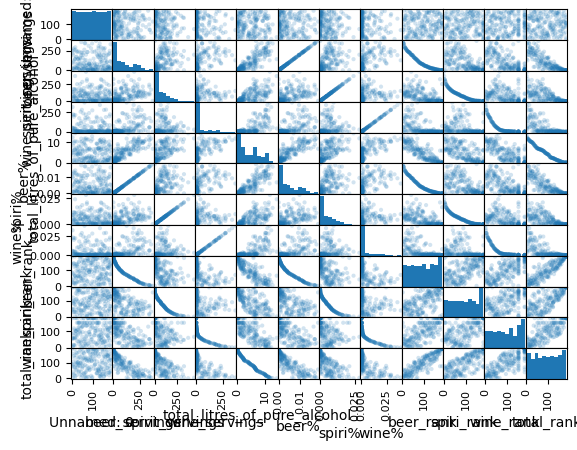

In [ ]:
#https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html
pd.plotting.scatter_matrix(df, alpha=0.2)

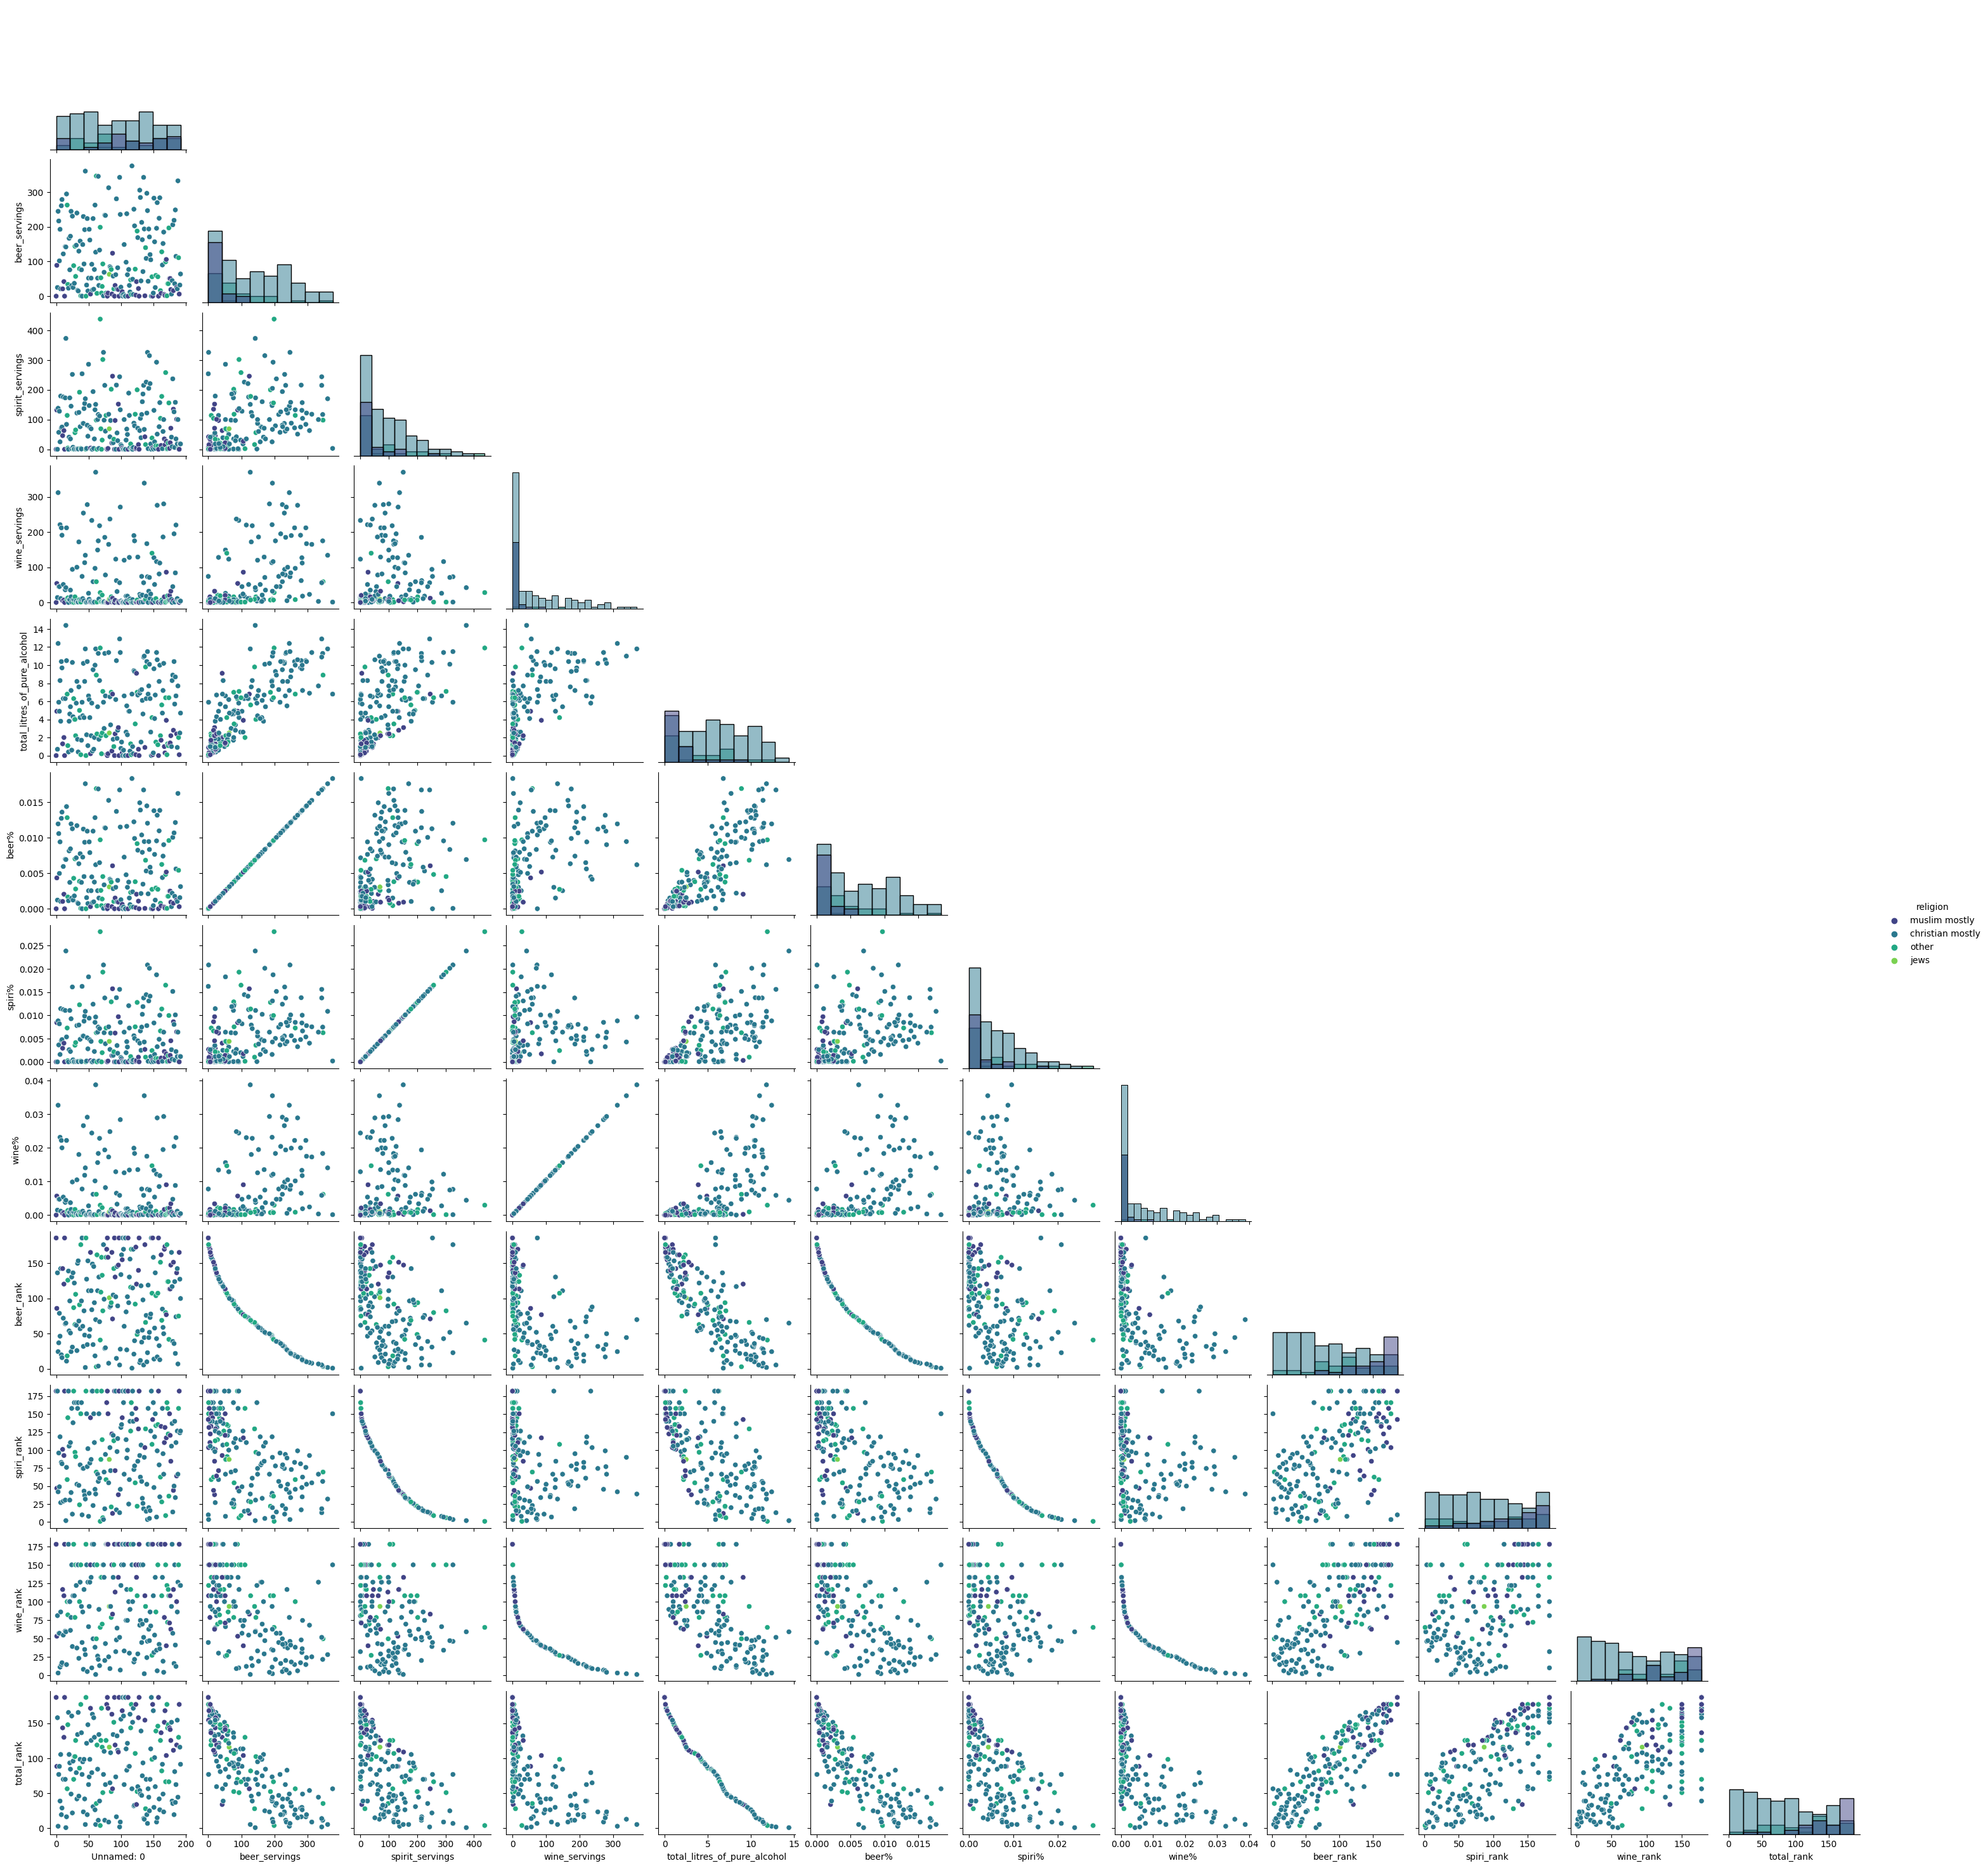

In [ ]:
sns.pairplot(df,palette='viridis',
             diag_kind='hist',
             hue="religion",
             corner=True)

In [ ]:
# 그룹화 및 시각화
# 그룹계산
beer_continent = df.groupby('religion').beer_servings.mean().idxmax()
print(beer_continent)


christian mostly


,mean,min,max,sum
religion,,,,
christian mostly,92.290323,0,373,11444
jews,69.000000,69,69,69
muslim mostly,37.088235,0,246,1261
other,84.058824,0,438,2858


In [ ]:
result = df.groupby('religion').spirit_servings.agg(['mean','min','max','sum'])
result.head()

total_mean = df.total_litres_of_pure_alcohol.mean()
religion_mean = df.groupby('religion')['total_litres_of_pure_alcohol'].mean()
religion_over_mean = religion_mean[religion_mean >= total_mean]
print(religion_over_mean)

religion
christian mostly    5.915323
Name: total_litres_of_pure_alcohol, dtype: float64


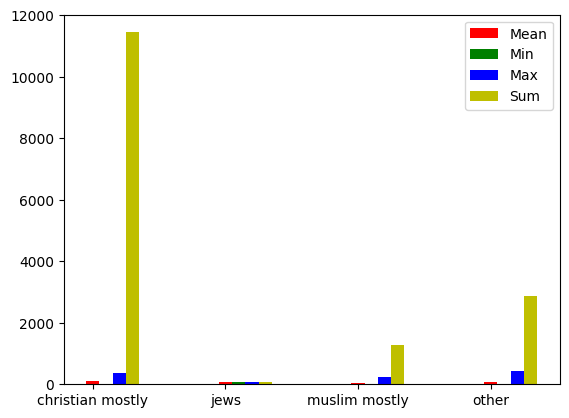

In [ ]:
# 종교별 spirit_servings의 평균, 최소, 최대, 합계를 시각화한다.
import numpy as np
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color='r', label='Mean')
rects2 = plt.bar(index + bar_width, mins, bar_width, color='g', label='Min')
rects3 = plt.bar(index + bar_width * 2, maxs, bar_width, color='b', label='Max')
rects4 = plt.bar(index + bar_width * 3, sums, bar_width, color='y', label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

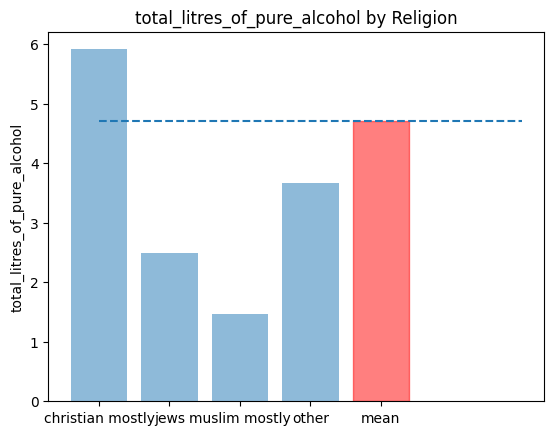

In [ ]:
religions = religion_mean.index.tolist()
religions.append('mean')
x_pos =np.arange(len(religions))
alcohol = religion_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(religions)-1].set_color('r')
plt.plot([0,6], [total_mean, total_mean], "--") #평균에 맞춰서 선에 넣어둠
plt.xticks(x_pos, religions)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Religion')

plt.show()

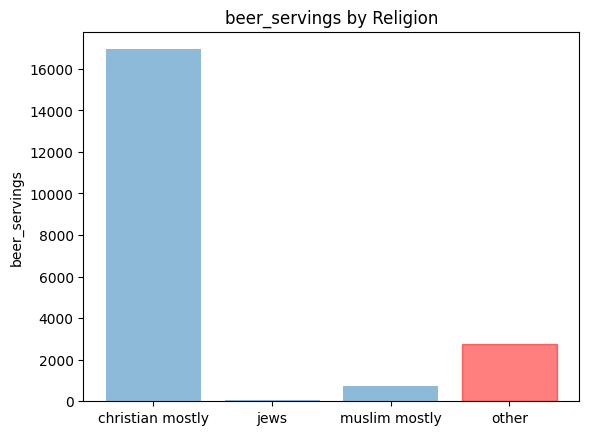

In [ ]:
# 종교별 veer_servings를 시각화 한다.
beer_group = df.groupby('religion')['beer_servings'].sum()
religions = beer_group.index.tolist()
y_pos = np.arange(len(religions))
alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[religions.index("other")].set_color('r')
plt.xticks(y_pos, religions)
plt.ylabel('beer_servings')
plt.title('beer_servings by Religion')

plt.show()

In [ ]:
#가장 많은 값이 무엇인지 모를때 다음과 같이 만들 수 있음
aa = df.groupby('religion')['beer_servings'].sum()
aa.max()
for i,name in zip(aa,aa.index):
    if i ==aa.max():
        print(name)

christian mostly
